In [53]:
import numpy as np
import pandas as pd
import json
from typing import Dict
from itertools import groupby
from functools import reduce
from collections import Counter

In [4]:
df = pd.read_json("export/export_0.json")
df.shape

(2000, 17)

In [5]:
df.columns

Index(['player', 'match', 'coaching', 'highlights', 'scores',
       'recommendations', 'patch', 'queueId', 'profileIconId', 'playerName',
       'gameId', 'region', 'mid', 'puuid', 'id', 'tft_set_number',
       'timestamp'],
      dtype='object')

In [6]:
df.player[0]

{'round_outcomes': {'by_round': {'1-1': {'board': [{'character_id': 'TFT3_Fiora',
      'character_name': 'Fiora',
      'level': '1',
      'items': [3],
      'cell': 'cell_25'}],
    'bench': [{'character_id': 'TFT3_Nocturne',
      'character_name': 'Nocturne',
      'level': '1',
      'items': [],
      'cell': 'slot_1'},
     {'character_id': 'TFT3_Xayah',
      'character_name': 'Xayah',
      'level': '1',
      'items': [],
      'cell': 'slot_2'}],
    'opponent': None,
    'type': 'PVE',
    'outcome': 1.0,
    'max_champion_level': 1},
   '1-3': {'board': [{'character_id': 'TFT3_Fiora',
      'character_name': 'Fiora',
      'level': '1',
      'items': [],
      'cell': 'cell_25'}],
    'bench': [{'character_id': 'TFT3_Nocturne',
      'character_name': 'Nocturne',
      'level': '1',
      'items': [],
      'cell': 'slot_1'},
     {'character_id': 'TFT3_Xayah',
      'character_name': 'Xayah',
      'level': '1',
      'items': [],
      'cell': 'slot_2'},
     {'charac

In [8]:
df.player[0].keys()

dict_keys(['round_outcomes', 'champion_damage', 'rerolls', 'store', 'gold', 'xp', 'health', 'final'])

In [96]:
df.player[0]["round_outcomes"]

{'by_round': {'1-1': {'board': [{'character_id': 'TFT3_Fiora',
     'character_name': 'Fiora',
     'level': '1',
     'items': [3],
     'cell': 'cell_25'}],
   'bench': [{'character_id': 'TFT3_Nocturne',
     'character_name': 'Nocturne',
     'level': '1',
     'items': [],
     'cell': 'slot_1'},
    {'character_id': 'TFT3_Xayah',
     'character_name': 'Xayah',
     'level': '1',
     'items': [],
     'cell': 'slot_2'}],
   'opponent': None,
   'type': 'PVE',
   'outcome': 1.0,
   'max_champion_level': 1},
  '1-3': {'board': [{'character_id': 'TFT3_Fiora',
     'character_name': 'Fiora',
     'level': '1',
     'items': [],
     'cell': 'cell_25'}],
   'bench': [{'character_id': 'TFT3_Nocturne',
     'character_name': 'Nocturne',
     'level': '1',
     'items': [],
     'cell': 'slot_1'},
    {'character_id': 'TFT3_Xayah',
     'character_name': 'Xayah',
     'level': '1',
     'items': [],
     'cell': 'slot_2'},
    {'character_id': 'TFT3_Xayah',
     'character_name': 'Xayah'

In [10]:
df.player[0]["champion_damage"]

{'by_round': {'1-1': {'opponent': None,
   'outcome': 1.0,
   'type': 'PVE',
   'units_level': {'TFT3_Fiora': 1.0},
   'units_damage': {'TFT3_Fiora': 608.0}},
  '1-3': {'opponent': None,
   'outcome': None,
   'type': 'PVE',
   'units_level': {'TFT3_Fiora': 1.0, 'TFT3_JarvanIV': 1.0},
   'units_damage': {'TFT3_Fiora': 588.0, 'TFT3_JarvanIV': 375.0}},
  '1-4': {'opponent': None,
   'outcome': None,
   'type': 'PVE',
   'units_level': {'TFT3_XinZhao': 1.0,
    'TFT3_Fiora': 1.0,
    'TFT3_JarvanIV': 1.0},
   'units_damage': {'TFT3_XinZhao': 711.0,
    'TFT3_Fiora': 312.0,
    'TFT3_JarvanIV': 250.0}},
  '2-1': {'opponent': 'dekhi4712',
   'outcome': 1.0,
   'type': 'PVP',
   'units_level': {'TFT3_Xayah': 1.0,
    'TFT3_Mordekaiser': 1.0,
    'TFT3_XinZhao': 1.0,
    'TFT3_JarvanIV': 1.0},
   'units_damage': {'TFT3_Xayah': 977.0,
    'TFT3_Mordekaiser': 486.0,
    'TFT3_XinZhao': 429.0,
    'TFT3_JarvanIV': 253.0}},
  '2-2': {'opponent': 'boss cute 1 2 ',
   'outcome': 0.0,
   'type': 'PV

In [11]:
char_rare_df =  pd.read_json('character_rarity.json', typ='series')
test = char_rare_df.to_frame('rarity')
test.head(10)

,rarity
TFT3_TwistedFate,0
TFT3_Poppy,0
TFT3_Zoe,0
TFT3_Ahri,1
TFT3_Syndra,2
TFT3_WuKong,3
TFT3_Viktor,3
TFT3_Janna,4
TFT3_Leona,0
TFT3_Ashe,2


In [12]:
with open('character_trait.json') as json_data:
    data_ct = json.load(json_data)
ct_df = pd.DataFrame(data_ct.items(), columns=['character','traits'])

In [13]:
ct_df.tail(30)

,character,traits
27,TFT3_Teemo,"[Sniper, Astro]"
28,TFT3_Blitzcrank,"[Brawler, Chrono]"
29,TFT3_Yasuo,"[Blademaster, Rebel]"
30,TFT3_MasterYi,"[Blademaster, Rebel]"
31,TFT3_Jhin,"[Sniper, DarkStar]"
32,TFT3_Zed,"[Infiltrator, Rebel]"
33,TFT3_Nautilus,"[Vanguard, Astro]"
34,TFT3_Syndra,"[Sorcerer, StarGuardian]"
35,TFT3_Zoe,"[Sorcerer, StarGuardian]"
36,TFT3_Shaco,"[Infiltrator, DarkStar]"


In [14]:
with open('full_mapping.json') as json_data:
    full_mapping = json.load(json_data)


In [17]:
full_mapping.keys()

dict_keys(['character_rarity_json', 'character_trait_json', 'character_to_name_json', 'trait_active_mapping_json', 'trait_tier_mapping_json', 'item_overwolf_mapping_json', 'item_mapping_json', 'scoring_tooltip_json', 'set_difference', 'patch_columns'])

In [18]:
with open('full_mapping.json') as json_data:
    fullmap = json.load(json_data)
print(fullmap.keys())
# How rare the character is i.e. how much it costs in game
char_rarity = pd.DataFrame(fullmap['character_rarity_json'].items())
char_rarity.columns = ['name', 'rarity']
char_rarity['rarity'].astype(str)
print(char_rarity)
# The traits of each character
char_trait = pd.DataFrame(fullmap['character_trait_json'].items()).astype(str)
char_trait.columns = ['name', 'trait']
print(char_trait)
# The name of each character
char_names = pd.DataFrame(fullmap['character_to_name_json'].items()).astype(str)
char_names.columns = ['name', 'name_proper']
print(char_names)
#  
active_trait = pd.DataFrame(fullmap['trait_active_mapping_json'].items())
print(active_trait)
trait_tier = pd.DataFrame(fullmap['trait_tier_mapping_json'].items())
print(trait_tier)
item_ow_mapping = pd.DataFrame(fullmap['item_overwolf_mapping_json'].items())
print(item_ow_mapping)
item_mapping = pd.DataFrame(fullmap['item_mapping_json'].items())
print(item_mapping)
scoring_tt = pd.DataFrame(fullmap['scoring_tooltip_json'].items())
print(scoring_tt)
set_diff = pd.DataFrame(fullmap['set_difference'].items())
print(set_diff)
patch_col = pd.DataFrame(fullmap['patch_columns'].items())
print(patch_col)
chars = char_names.merge(char_trait).merge(char_rarity)
print(chars)

dict_keys(['character_rarity_json', 'character_trait_json', 'character_to_name_json', 'trait_active_mapping_json', 'trait_tier_mapping_json', 'item_overwolf_mapping_json', 'item_mapping_json', 'scoring_tooltip_json', 'set_difference', 'patch_columns'])
                name  rarity
0   TFT3_TwistedFate       0
1         TFT3_Poppy       0
2           TFT3_Zoe       0
3          TFT3_Ahri       1
4        TFT3_Syndra       2
5        TFT3_WuKong       3
6        TFT3_Viktor       3
7         TFT3_Janna       4
8         TFT3_Leona       0
9          TFT3_Ashe       2
10        TFT3_Vayne       2
11        TFT3_Karma       2
12       TFT3_Irelia       3
13        TFT3_Riven       3
14         TFT3_Lulu       4
15     TFT3_Nocturne       0
16        TFT3_Annie       1
17          TFT3_Zed       1
18        TFT3_Shaco       2
19       TFT3_Rumble       2
20         TFT3_Fizz       3
21       TFT3_Illaoi       0
22        TFT3_Yasuo       1
23   TFT3_Blitzcrank       1
24       TFT3_Ezreal  

## Calculating average damage for each unique character and item combination

### Concatenating round outcomes and champion damage dictionaries

In [19]:
round_outcome_damage = []
for i,players in enumerate(df.player):
    for rounds_key in players["round_outcomes"]["by_round"].keys():
        try:
            if(rounds_key in (players["round_outcomes"]["by_round"] and players["champion_damage"]["by_round"])):
                round_outcome_damage.append({'round': rounds_key, **players["round_outcomes"]["by_round"][rounds_key], 
                                **players["champion_damage"]["by_round"][rounds_key]})
        except:
            print(i)
            print(rounds_key)
            print(players["round_outcomes"]["by_round"][rounds_key])
            print(players["champion_damage"]["by_round"][rounds_key])
round_outcome_damage[32]
        

{'round': '1-4',
 'board': [{'character_id': 'TFT3_Leona',
   'character_name': 'Leona',
   'level': '1',
   'items': [],
   'cell': 'cell_10'},
  {'character_id': 'TFT3_Poppy',
   'character_name': 'Poppy',
   'level': '1',
   'items': [],
   'cell': 'cell_11'}],
 'bench': [{'character_id': 'TFT3_Cassiopeia',
   'character_name': 'Cassiopeia',
   'level': '1',
   'items': [],
   'cell': 'slot_1'},
  {'character_id': 'TFT3_TwistedFate',
   'character_name': 'TwistedFate',
   'level': '1',
   'items': [],
   'cell': 'slot_2'},
  {'character_id': 'TFT3_Annie',
   'character_name': 'Annie',
   'level': '1',
   'items': [],
   'cell': 'slot_3'},
  {'character_id': 'TFT3_Blitzcrank',
   'character_name': 'Blitzcrank',
   'level': '1',
   'items': [],
   'cell': 'slot_4'},
  {'character_id': 'TFT3_TwistedFate',
   'character_name': 'TwistedFate',
   'level': '1',
   'items': [],
   'cell': 'slot_5'}],
 'opponent': None,
 'type': 'PVE',
 'outcome': None,
 'max_champion_level': 1,
 'units_leve

### Producing a list of tuples in the format: (character_id, items_equipped, level, damage)

In [20]:
char_items_level_damage = []
for match in round_outcome_damage:
    for keys in match.keys():
        for char in match["board"]:
            if(char['character_id'] in match["units_damage"]):
                char_items_level_damage.append([char["character_id"], char["items"], match['units_level'][char['character_id']], match["units_damage"][char['character_id']]])

In [99]:
char_items_level_damage[:10]

[['TFT3_Ahri', [], 0.0, 1465.0],
 ['TFT3_Ahri', [], 0.0, 1465.0],
 ['TFT3_Ahri', [], 0.0, 1465.0],
 ['TFT3_Ahri', [], 0.0, 1465.0],
 ['TFT3_Ahri', [], 0.0, 1465.0],
 ['TFT3_Ahri', [], 0.0, 1465.0],
 ['TFT3_Ahri', [], 0.0, 1465.0],
 ['TFT3_Ahri', [], 0.0, 1465.0],
 ['TFT3_Ahri', [], 0.0, 1465.0],
 ['TFT3_Ahri', [], 1.0, 1192.0]]

In [22]:
char_items_level_damage.sort(key= lambda x: (x[0],x[1],x[2]))

In [100]:
char_items_level_damage[:10]

[['TFT3_Ahri', [], 0.0, 1465.0],
 ['TFT3_Ahri', [], 0.0, 1465.0],
 ['TFT3_Ahri', [], 0.0, 1465.0],
 ['TFT3_Ahri', [], 0.0, 1465.0],
 ['TFT3_Ahri', [], 0.0, 1465.0],
 ['TFT3_Ahri', [], 0.0, 1465.0],
 ['TFT3_Ahri', [], 0.0, 1465.0],
 ['TFT3_Ahri', [], 0.0, 1465.0],
 ['TFT3_Ahri', [], 0.0, 1465.0],
 ['TFT3_Ahri', [], 1.0, 1192.0]]

### Grouping tuples with key  = (character_id, items_equipped, level) and calculating average damage for each group

In [106]:
#char_items_level_damage
avg_damage = []
for item in groupby(char_items_level_damage, key= lambda x: (x[0],x[1],x[2])):
    #print(item)
    damage = [x[3] for x in item[1]]
    avg_damage.append([item[0],sum(damage)/len(damage)])
avg_damage[:20]    

[[('TFT3_Ahri', [], 0.0), 1465.0],
 [('TFT3_Ahri', [], 1.0), 930.5227070347285],
 [('TFT3_Ahri', [], 2.0), 1677.122131754256],
 [('TFT3_Ahri', [], 3.0), 3219.5220588235293],
 [('TFT3_Ahri', [1], 1.0), 944.0],
 [('TFT3_Ahri', [1, 22, 99], 2.0), 680.0],
 [('TFT3_Ahri', [2], 1.0), 1005.6666666666666],
 [('TFT3_Ahri', [2], 2.0), 1535.3333333333333],
 [('TFT3_Ahri', [2, 12, 99], 2.0), 998.0],
 [('TFT3_Ahri', [2, 35], 2.0), 2261.0],
 [('TFT3_Ahri', [3], 1.0), 554.0],
 [('TFT3_Ahri', [3], 2.0), 2221.8333333333335],
 [('TFT3_Ahri', [3, 34, 99], 2.0), 1328.0],
 [('TFT3_Ahri', [3, 37, 44], 2.0), 3177.0],
 [('TFT3_Ahri', [3, 44], 1.0), 1741.0],
 [('TFT3_Ahri', [3, 44], 2.0), 3097.2],
 [('TFT3_Ahri', [3, 56], 1.0), 1260.0],
 [('TFT3_Ahri', [4], 1.0), 1273.7272727272727],
 [('TFT3_Ahri', [4], 2.0), 1212.375],
 [('TFT3_Ahri', [4, 37], 2.0), 2679.2]]

#### Top 10 tuples with highest avg_damage

In [102]:
sorted(avg_damage, key= lambda x: -x[1])[:10]

[[('TFT3_Jhin', [15, 19, 22], 3.0), 90757.66666666667],
 [('TFT3_Jhin', [15, 29], 3.0), 86809.5],
 [('TFT3_Jhin', [], 3.0), 84320.73684210527],
 [('TFT3_Jhin', [12, 19], 3.0), 84183.0],
 [('TFT3_Jhin', [19, 29, 69], 3.0), 83718.25],
 [('TFT3_Jhin', [15, 26], 3.0), 81900.5],
 [('TFT3_Jhin', [15, 19, 29], 3.0), 79725.6],
 [('TFT3_Jhin', [19, 34], 3.0), 69402.71428571429],
 [('TFT3_Jhin', [19, 26, 29], 3.0), 66826.33333333333],
 [('TFT3_Jhin', [15, 16, 19], 3.0), 64543.75]]

In [105]:
avg_damage_flat = [(*x[0], x[1]) for x in avg_damage]
avg_damage_flat[:10]

[('TFT3_Ahri', [], 0.0, 1465.0),
 ('TFT3_Ahri', [], 1.0, 930.5227070347285),
 ('TFT3_Ahri', [], 2.0, 1677.122131754256),
 ('TFT3_Ahri', [], 3.0, 3219.5220588235293),
 ('TFT3_Ahri', [1], 1.0, 944.0),
 ('TFT3_Ahri', [1, 22, 99], 2.0, 680.0),
 ('TFT3_Ahri', [2], 1.0, 1005.6666666666666),
 ('TFT3_Ahri', [2], 2.0, 1535.3333333333333),
 ('TFT3_Ahri', [2, 12, 99], 2.0, 998.0),
 ('TFT3_Ahri', [2, 35], 2.0, 2261.0)]

In [28]:
avg_damage_df = pd.DataFrame(avg_damage_flat, columns=['character_id', 'items', 'level', 'avg_damage'])
avg_damage_df

,character_id,items,level,avg_damage
0,TFT3_Ahri,[],0.0,1465.000000
1,TFT3_Ahri,[],1.0,930.522707
2,TFT3_Ahri,[],2.0,1677.122132
3,TFT3_Ahri,[],3.0,3219.522059
4,TFT3_Ahri,[1],1.0,944.000000
...,...,...,...,...
10989,TFT3_Zoe,[88],2.0,856.540000
10990,TFT3_Zoe,[88],3.0,1232.227273
10991,TFT3_Zoe,[89],3.0,786.333333
10992,TFT3_Zoe,[99],2.0,1135.833333


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
avg_damage_df[avg_damage_df['avg_damage'] > 40000]

,character_id,items,level,avg_damage
4102,TFT3_Jhin,[],3.0,84320.736842
4231,TFT3_Jhin,"[12, 19]",3.0,84183.000000
4253,TFT3_Jhin,"[15, 16, 19]",3.0,64543.750000
4259,TFT3_Jhin,"[15, 19]",3.0,43465.333333
4262,TFT3_Jhin,"[15, 19, 22]",3.0,90757.666667
4267,TFT3_Jhin,"[15, 19, 29]",3.0,79725.600000
4280,TFT3_Jhin,"[15, 26]",3.0,81900.500000
4284,TFT3_Jhin,"[15, 26, 29]",3.0,54063.000000
4288,TFT3_Jhin,"[15, 29]",3.0,86809.500000
4319,TFT3_Jhin,[19],3.0,44444.600000


In [31]:
# for item_dmg in grouby(sorted(np.asarray([[y,x[2]] for x in avg_damage_flat for y in x[1]]), key= lambda x: x[0]), key= lambda x: x[0]):
#     [for x in item_dmg[1]]
# item_avg_damage = pd.DataFrame(, columns= ['item','avg_damage'])
# item_avg_damage

## Characters sorted by avg_damage (descending) 

In [107]:
avg_damage_df.groupby('character_id')["avg_damage"].mean().sort_values(ascending = False).head()

character_id
TFT3_Jhin         7075.604683
TFT3_Urgot        3560.676016
TFT3_Xerath       3371.021811
TFT3_Gangplank    3357.627063
TFT3_Viktor       3332.318264
Name: avg_damage, dtype: float64

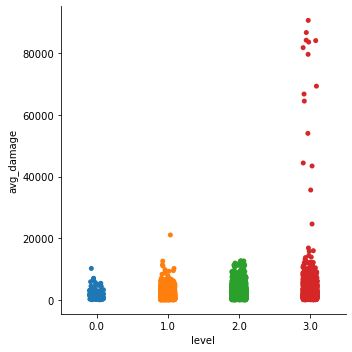

In [32]:
sns.catplot(x='level', y='avg_damage', data= avg_damage_df)

### 3 most common items equipped by each character

In [93]:
avg_damage_df.groupby("character_id")["items"].sum() \
    .apply(lambda x: Counter(x).most_common(3)).apply(lambda x: {y[0] for y in x}).head()


character_id
TFT3_Ahri           {99, 44, 39}
TFT3_Annie           {3, 44, 39}
TFT3_Ashe           {26, 14, 23}
TFT3_AurelionSol    {44, 37, 39}
TFT3_Bard           {44, 14, 15}
Name: items, dtype: object

### For each character, the items and level that result in the maximum avg damage

In [94]:
avg_damage_df.groupby("character_id")["avg_damage"].idxmax() \
    .apply(lambda x: avg_damage_df.iloc[x][['items', 'avg_damage', 'level']]).head()

,items,avg_damage,level
character_id,,,
TFT3_Ahri,"[33, 39]",9031.50,3.0
TFT3_Annie,"[5, 36]",3764.20,3.0
TFT3_Ashe,"[14, 14, 26]",7010.75,3.0
TFT3_AurelionSol,"[25, 37]",7158.00,2.0
TFT3_Bard,"[2, 23, 24]",2938.00,2.0


## Calculating average round outcome for each unique character and item combination

### Filtering out PVP type matches

In [33]:
# rounds = {roundNo: value for players in df.player for roundNo, value in players["round_outcomes"]["by_round"].items() if value["type"] == 'PVP'}
rounds = [value for players in df.player for roundNo, value in players["round_outcomes"]["by_round"].items() if value["type"] == 'PVP']
rounds[:10]

[{'board': [{'character_id': 'TFT3_XinZhao',
    'character_name': 'XinZhao',
    'level': '1',
    'items': [],
    'cell': 'cell_24'},
   {'character_id': 'TFT3_Fiora',
    'character_name': 'Fiora',
    'level': '1',
    'items': [],
    'cell': 'cell_25'},
   {'character_id': 'TFT3_JarvanIV',
    'character_name': 'JarvanIV',
    'level': '1',
    'items': [],
    'cell': 'cell_26'}],
  'bench': [{'character_id': 'TFT3_Caitlyn',
    'character_name': 'Caitlyn',
    'level': '1',
    'items': [],
    'cell': 'slot_1'},
   {'character_id': 'TFT3_Xayah',
    'character_name': 'Xayah',
    'level': '1',
    'items': [],
    'cell': 'slot_2'}],
  'opponent': 'dekhi4712',
  'type': 'PVP',
  'outcome': 1.0,
  'max_champion_level': 1},
 {'board': [{'character_id': 'TFT3_Xayah',
    'character_name': 'Xayah',
    'level': '1',
    'items': [19],
    'cell': 'cell_11'},
   {'character_id': 'TFT3_XinZhao',
    'character_name': 'XinZhao',
    'level': '1',
    'items': [],
    'cell': 'cell_2

In [34]:
damage_rounds = [value for players in df.player for roundNo, value in players["champion_damage"]["by_round"].items() if value["type"] == 'PVP']
damage_rounds

[{'opponent': 'dekhi4712',
  'outcome': 1.0,
  'type': 'PVP',
  'units_level': {'TFT3_Xayah': 1.0,
   'TFT3_Mordekaiser': 1.0,
   'TFT3_XinZhao': 1.0,
   'TFT3_JarvanIV': 1.0},
  'units_damage': {'TFT3_Xayah': 977.0,
   'TFT3_Mordekaiser': 486.0,
   'TFT3_XinZhao': 429.0,
   'TFT3_JarvanIV': 253.0}},
 {'opponent': 'boss cute 1 2 ',
  'outcome': 0.0,
  'type': 'PVP',
  'units_level': {'TFT3_XinZhao': 1.0,
   'TFT3_Mordekaiser': 1.0,
   'TFT3_Xayah': 2.0,
   'TFT3_JarvanIV': 1.0},
  'units_damage': {'TFT3_XinZhao': 444.0,
   'TFT3_Mordekaiser': 443.0,
   'TFT3_Xayah': 2503.0,
   'TFT3_JarvanIV': 249.0}},
 {'opponent': 'øˇÇöï kïëñˇø',
  'outcome': 0.0,
  'type': 'PVP',
  'units_level': {'TFT3_XinZhao': 1.0,
   'TFT3_JarvanIV': 1.0,
   'TFT3_Mordekaiser': 1.0,
   'TFT3_Xayah': 2.0},
  'units_damage': {'TFT3_XinZhao': 717.0,
   'TFT3_JarvanIV': 395.0,
   'TFT3_Mordekaiser': 274.0,
   'TFT3_Xayah': 2559.0}},
 {'opponent': 'FÇ...Hïnätä',
  'outcome': 1.0,
  'type': 'PVP',
  'units_level': {'T

### Get charcter_id, items equipped, and round outcome for each round

In [35]:
#[{ chars['character_name'], chars['items'], roundInfo['outcome'] } for roundNo, roundInfo in rounds.items() for chars in roundInfo['board'] ]
# [roundInfo 
#       for roundNo, roundInfo in rounds.items()]

# res = [[roundNo, chars['character_id'], chars['items'], roundInfo['outcome']] for roundNo, roundInfo in rounds.items() for chars in roundInfo['board'] ]
# res = [[chars['character_id'], chars['items'], roundInfo['outcome']] for roundNo, roundInfo in rounds.items() for chars in roundInfo['board'] ]
res = [[chars['character_id'], chars['items'], roundInfo['outcome']] for roundInfo in rounds for chars in roundInfo['board'] ]
res


[['TFT3_XinZhao', [], 1.0],
 ['TFT3_Fiora', [], 1.0],
 ['TFT3_JarvanIV', [], 1.0],
 ['TFT3_Xayah', [19], 0.0],
 ['TFT3_XinZhao', [], 0.0],
 ['TFT3_Mordekaiser', [77], 0.0],
 ['TFT3_JarvanIV', [], 0.0],
 ['TFT3_Xayah', [19], 0.0],
 ['TFT3_XinZhao', [], 0.0],
 ['TFT3_Mordekaiser', [77], 0.0],
 ['TFT3_JarvanIV', [], 0.0],
 ['TFT3_Karma', [], 1.0],
 ['TFT3_Xayah', [19], 1.0],
 ['TFT3_XinZhao', [], 1.0],
 ['TFT3_Mordekaiser', [77], 1.0],
 ['TFT3_JarvanIV', [], 1.0],
 ['TFT3_Xayah', [19], 1.0],
 ['TFT3_Karma', [], 1.0],
 ['TFT3_XinZhao', [], 1.0],
 ['TFT3_JarvanIV', [], 1.0],
 ['TFT3_Mordekaiser', [77], 1.0],
 ['TFT3_Xayah', [], 0.0],
 ['TFT3_Karma', [], 0.0],
 ['TFT3_XinZhao', [], 0.0],
 ['TFT3_JarvanIV', [], 0.0],
 ['TFT3_Mordekaiser', [], 0.0],
 ['TFT3_Xayah', [19], 0.0],
 ['TFT3_Karma', [], 0.0],
 ['TFT3_XinZhao', [], 0.0],
 ['TFT3_JarvanIV', [], 0.0],
 ['TFT3_Mordekaiser', [77], 0.0],
 ['TFT3_Xayah', [19], 1.0],
 ['TFT3_Caitlyn', [], 1.0],
 ['TFT3_XinZhao', [], 1.0],
 ['TFT3_JarvanIV', 

### Sort by character_id and items equipped

In [36]:
res_sorted = sorted(res, key= lambda x: (x[0], x[1]))
res_sorted = [x for x in res_sorted if x[2] != None]
res_sorted

[['TFT3_Ahri', [], 0.0],
 ['TFT3_Ahri', [], 0.0],
 ['TFT3_Ahri', [], 1.0],
 ['TFT3_Ahri', [], 1.0],
 ['TFT3_Ahri', [], 0.0],
 ['TFT3_Ahri', [], 0.0],
 ['TFT3_Ahri', [], 0.0],
 ['TFT3_Ahri', [], 0.0],
 ['TFT3_Ahri', [], 0.0],
 ['TFT3_Ahri', [], 1.0],
 ['TFT3_Ahri', [], 1.0],
 ['TFT3_Ahri', [], 0.0],
 ['TFT3_Ahri', [], 0.0],
 ['TFT3_Ahri', [], 1.0],
 ['TFT3_Ahri', [], 0.0],
 ['TFT3_Ahri', [], 0.0],
 ['TFT3_Ahri', [], 1.0],
 ['TFT3_Ahri', [], 1.0],
 ['TFT3_Ahri', [], 1.0],
 ['TFT3_Ahri', [], 0.0],
 ['TFT3_Ahri', [], 0.0],
 ['TFT3_Ahri', [], 1.0],
 ['TFT3_Ahri', [], 0.0],
 ['TFT3_Ahri', [], 0.0],
 ['TFT3_Ahri', [], 1.0],
 ['TFT3_Ahri', [], 1.0],
 ['TFT3_Ahri', [], 1.0],
 ['TFT3_Ahri', [], 0.0],
 ['TFT3_Ahri', [], 1.0],
 ['TFT3_Ahri', [], 1.0],
 ['TFT3_Ahri', [], 1.0],
 ['TFT3_Ahri', [], 0.0],
 ['TFT3_Ahri', [], 1.0],
 ['TFT3_Ahri', [], 0.0],
 ['TFT3_Ahri', [], 1.0],
 ['TFT3_Ahri', [], 1.0],
 ['TFT3_Ahri', [], 1.0],
 ['TFT3_Ahri', [], 1.0],
 ['TFT3_Ahri', [], 0.0],
 ['TFT3_Ahri', [], 1.0],


### Grouping tuples by character_id and items_equipped and calculating average round outcome for each group

In [122]:
res_sorted_grouped = groupby(res_sorted, lambda x: (x[0], x[1]))

In [123]:
char_item_avg_outcome = []
for x in res_sorted_grouped:
    #print(x)
    round_outcomes = [y[2] for y in x[1]]
    #print((x[0], sum(round_outcomes)/len(round_outcomes)))   
    char_item_avg_outcome.append([*x[0], sum(round_outcomes)/len(round_outcomes)])

In [124]:
char_item_avg_outcome 

[['TFT3_Ahri', [], 0.5250755287009063],
 ['TFT3_Ahri', [1], 1.0],
 ['TFT3_Ahri', [1, 22, 99], 0.0],
 ['TFT3_Ahri', [2], 0.5454545454545454],
 ['TFT3_Ahri', [2, 12, 99], 0.0],
 ['TFT3_Ahri', [2, 35], 1.0],
 ['TFT3_Ahri', [3], 0.1111111111111111],
 ['TFT3_Ahri', [3, 34, 99], 1.0],
 ['TFT3_Ahri', [3, 37, 44], 0.3333333333333333],
 ['TFT3_Ahri', [3, 44], 0.6666666666666666],
 ['TFT3_Ahri', [3, 56], 0.0],
 ['TFT3_Ahri', [4], 0.3684210526315789],
 ['TFT3_Ahri', [4, 37], 0.75],
 ['TFT3_Ahri', [4, 99], 0.0],
 ['TFT3_Ahri', [6], 0.5],
 ['TFT3_Ahri', [7], 0.3333333333333333],
 ['TFT3_Ahri', [7, 39], 0.75],
 ['TFT3_Ahri', [7, 44], 0.0],
 ['TFT3_Ahri', [8], 0.3333333333333333],
 ['TFT3_Ahri', [8, 15, 44], 0.3333333333333333],
 ['TFT3_Ahri', [9], 0.5],
 ['TFT3_Ahri', [9, 89], 1.0],
 ['TFT3_Ahri', [11], 0.5],
 ['TFT3_Ahri', [11, 49], 0.6666666666666666],
 ['TFT3_Ahri', [12], 0.7],
 ['TFT3_Ahri', [12, 14, 26], 0.0],
 ['TFT3_Ahri', [12, 15], 0.6666666666666666],
 ['TFT3_Ahri', [14, 26], 0.333333333333